In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 데이터 불러오기
url = 'https://github.com/MyungKyuYi/AI-class/raw/main/BP_data.csv'
df = pd.read_csv(url)
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


<Axes: ylabel='count'>

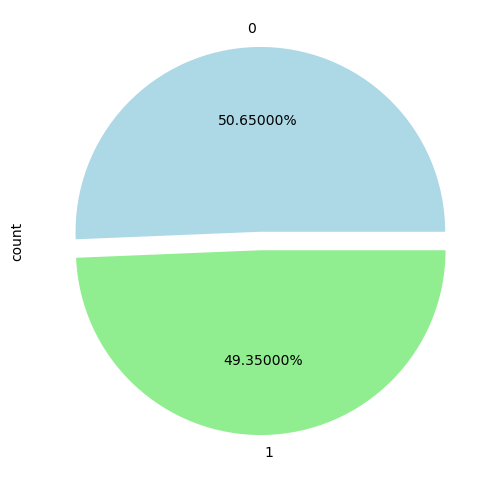

In [122]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
df.Blood_Pressure_Abnormality.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen'], explode=(0.05, 0.05))

In [124]:
df.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [126]:
print(df['Blood_Pressure_Abnormality'].value_counts())

Blood_Pressure_Abnormality
0    1013
1     987
Name: count, dtype: int64


In [128]:
#결측치 확인
df.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [130]:
# Alcohol 컬럼만 0으로 채움
df['alcohol_consumption_per_day'] = df['alcohol_consumption_per_day'].fillna(0)

# pregnacy 컬럼 0으로 채움
df['Pregnancy'] = df['Pregnancy'].fillna(0)

In [132]:
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,0.0,2,1,1
1,2,0,9.75,0.23,54,33,1,0.0,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,0.0,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,0.0,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,0.0,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,0.0,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,0.0,3,1,1
1997,1998,1,16.91,0.22,18,42,0,0.0,0,14933,24753,0.0,2,1,1
1998,1999,0,11.15,0.72,46,45,1,0.0,1,18157,15275,253.0,3,0,1


In [134]:
df.isnull().sum()

Patient_Number                    0
Blood_Pressure_Abnormality        0
Level_of_Hemoglobin               0
Genetic_Pedigree_Coefficient     92
Age                               0
BMI                               0
Sex                               0
Pregnancy                         0
Smoking                           0
Physical_activity                 0
salt_content_in_the_diet          0
alcohol_consumption_per_day       0
Level_of_Stress                   0
Chronic_kidney_disease            0
Adrenal_and_thyroid_disorders     0
dtype: int64

In [136]:
# Genetic_Pedigree_Coefficient 컬럼의 결측치는 평균으로 채움
df.fillna(df.mean(numeric_only=True), inplace=True)

In [138]:
df.isnull().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [140]:
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,0.0,2,1,1
1,2,0,9.75,0.23,54,33,1,0.0,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,0.0,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,0.0,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,0.0,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,0.0,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,0.0,3,1,1
1997,1998,1,16.91,0.22,18,42,0,0.0,0,14933,24753,0.0,2,1,1
1998,1999,0,11.15,0.72,46,45,1,0.0,1,18157,15275,253.0,3,0,1


In [142]:
df = df.drop(['Patient_Number'], axis=1)

In [144]:
df

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,0.90,34,23,1,1.0,0,45961,48071,0.0,2,1,1
1,0,9.75,0.23,54,33,1,0.0,0,26106,25333,205.0,3,0,0
2,1,10.79,0.91,70,49,0,0.0,0,9995,29465,67.0,2,1,0
3,0,11.00,0.43,71,50,0,0.0,0,10635,7439,242.0,1,1,0
4,1,14.17,0.83,52,19,0,0.0,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,10.14,0.02,69,26,1,0.0,1,26118,47568,144.0,3,1,0
1996,1,11.77,1.00,24,45,1,1.0,1,2572,8063,0.0,3,1,1
1997,1,16.91,0.22,18,42,0,0.0,0,14933,24753,0.0,2,1,1
1998,0,11.15,0.72,46,45,1,0.0,1,18157,15275,253.0,3,0,1


In [146]:
X = df.drop(['Blood_Pressure_Abnormality'], axis=1)  # 피처(입력값)
y = df['Blood_Pressure_Abnormality']  # 레이블(정답)

In [148]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [150]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((1600, 13), (1600,), (400, 13), (400,))

In [152]:
type(y_train)

pandas.core.series.Series

In [154]:
type(y_test)

pandas.core.series.Series

In [156]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import TensorDataset, DataLoader

# 텐서 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

# y만 pandas.Series니까 to_numpy로 변환
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32).view(-1, 1)

In [158]:
# 모델 정의
class BPModel(nn.Module):
    def __init__(self):
        super(BPModel, self).__init__()
        self.fc1 = nn.Linear(13, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x  # BCEWithLogitsLoss는 sigmoid 포함됨

In [160]:
# 손실함수, 옵티마이저 설정
model = BPModel()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [162]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [164]:
# 테스트용 데이터셋과 로더
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [166]:
# 학습 손실과 정확도 저장 리스트
train_losses = []
test_accuracies = []

# 학습 반복
num_epochs = 20
for epoch in range(num_epochs):
    model.train()  # 학습 모드
    running_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)  # 순전파
        loss = criterion(outputs, labels)  # 손실 계산

        loss.backward()  # 역전파
        optimizer.step()  # 가중치 갱신

        running_loss += loss.item()

    # 에폭당 평균 손실 저장
    train_losses.append(running_loss / len(train_loader))

    # 테스트 정확도 평가
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            preds = torch.sigmoid(outputs)  # 시그모이드로 확률화
            predicted = (preds > 0.5).float()  # 확률 > 0.5 → 1, 아니면 0
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    # 에폭 로그 출력
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 0.6946, Accuracy: 50.75%
Epoch 2/20, Loss: 0.6729, Accuracy: 66.25%
Epoch 3/20, Loss: 0.6368, Accuracy: 71.25%
Epoch 4/20, Loss: 0.5875, Accuracy: 72.50%
Epoch 5/20, Loss: 0.5468, Accuracy: 72.50%
Epoch 6/20, Loss: 0.5239, Accuracy: 74.00%
Epoch 7/20, Loss: 0.5078, Accuracy: 75.50%
Epoch 8/20, Loss: 0.4950, Accuracy: 75.50%
Epoch 9/20, Loss: 0.4845, Accuracy: 76.00%
Epoch 10/20, Loss: 0.4714, Accuracy: 76.00%
Epoch 11/20, Loss: 0.4597, Accuracy: 75.75%
Epoch 12/20, Loss: 0.4485, Accuracy: 76.75%
Epoch 13/20, Loss: 0.4366, Accuracy: 78.00%
Epoch 14/20, Loss: 0.4234, Accuracy: 78.75%
Epoch 15/20, Loss: 0.4092, Accuracy: 80.75%
Epoch 16/20, Loss: 0.3959, Accuracy: 82.00%
Epoch 17/20, Loss: 0.3815, Accuracy: 82.50%
Epoch 18/20, Loss: 0.3680, Accuracy: 84.50%
Epoch 19/20, Loss: 0.3552, Accuracy: 84.75%
Epoch 20/20, Loss: 0.3441, Accuracy: 85.50%
Training complete.


In [167]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
import numpy as np

# 모델 평가
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        probs = torch.sigmoid(outputs)                   # 시그모이드로 확률값
        predicted = (probs > 0.5).float()                # 0.5 기준 이진 분류
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# 넘파이 배열로 변환
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# 혼동 행렬
conf_matrix = confusion_matrix(all_labels, all_predictions)

# 주요 지표 계산
f1 = f1_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
roc_auc = roc_auc_score(all_labels, all_predictions)

# specificity (특이도) 계산
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
specificity = tn / (tn + fp)

# 결과 출력
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall (Sensitivity): {recall:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')

Confusion Matrix:
[[175  33]
 [ 25 167]]
F1 Score: 0.85
Precision: 0.83
Recall (Sensitivity): 0.87
Specificity: 0.84
ROC-AUC Score: 0.86
